In [66]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import scipy.integrate as intgr
import scipy.optimize as opt
import matplotlib.pyplot as plt
import numpy.linalg as lin

# Problem 1

(0, 150000)

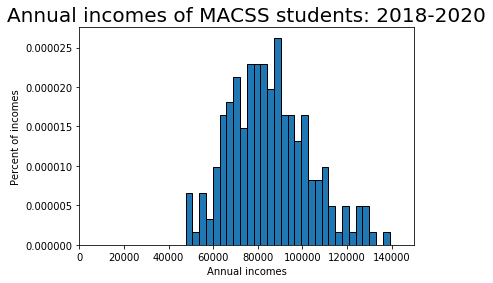

In [120]:
# 1(a)
ics = np.loadtxt('data/incomes.txt')

num_bins = 30

plt.hist(ics, num_bins, normed=True, edgecolor='k')

plt.title('Annual incomes of MACSS students: 2018-2020', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')
plt.xlim([0, 150000])

In [104]:
# 1(b)

def data_moments(xvals):

    mean_data = xvals.mean()
    std_data = xvals.std()
    
    return mean_data, std_data

def LN_pdf(xvals, mu, sigma):

    pdf_vals = np.float64(((1 / (np.sqrt(2 * np.pi) * sigma * xvals)) *
                          np.exp((-1.0 / 2.0) *
                          (((np.log(xvals) - mu) / sigma) ** 2))))

    return pdf_vals

# def model_moments(mu, sigma, cut_lb, cut_ub):

#     xfx = lambda x: x * trunc_lognorm_pdf(x, mu, sigma, cut_lb, cut_ub)
#     (mean_model, m_m_err) = intgr.quad(xfx, cut_lb, cut_ub)
#     x2fx = lambda x: ((x - mean_model) ** 2) * trunc_lognorm_pdf(x, mu, sigma, cut_lb, cut_ub) 
#     (var_model, v_m_err) = intgr.quad(x2fx, cut_lb, cut_ub)
#     std_model = np.sqrt(var_model)
    
#     return mean_model, std_model

# def model_moments(mu, sigma, cut_lb, cut_ub):

#     xfx = lambda x: x * LN_pdf(x, mu, sigma, cut_lb, cut_ub)
#     (mean_model, m_m_err) = intgr.quad(xfx, cut_lb, cut_ub)
#     x2fx = lambda x: ((x - mean_model) ** 2) * LN_pdf(x, mu, sigma, cut_lb, cut_ub) 
#     (var_model, v_m_err) = intgr.quad(x2fx, cut_lb, cut_ub)
#     std_model = np.sqrt(var_model)
    
#     return mean_model, std_model

# def err_vec(xvals, mu, sigma, cut_lb, cut_ub, simple):

#     mean_data, std_data = data_moments(xvals)
#     moms_data = np.array([[mean_data], [std_data]])
#     mean_model, std_model = model_moments(mu, sigma, cut_lb, cut_ub)
#     moms_model = np.array([[mean_model], [std_model]])
#     if simple:
#         err_vec = moms_model - moms_data
#     else:
#         err_vec = (moms_model - moms_data) / moms_data
    
#     return err_vec

def model_moments(mu, sigma):

    mean_model = np.exp(mu + 0.5 * sigma ** 2)
    std_model = np.sqrt((np.exp(sigma ** 2) - 1) * np.exp(2 * mu + sigma ** 2))
    return mean_model, std_model

def err_vec(xvals, mu, sigma, simple):

    mean_data, std_data = data_moments(xvals)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

# def criterion(params, *args):

#     mu, sigma = params
#     xvals, cut_lb, cut_ub, W = args
#     err = err_vec(xvals, mu, sigma, cut_lb, cut_ub, simple=False)
#     crit_val = err.T @ W @ err
    
#     return crit_val

def criterion(params, *args):

    mu, sigma = params
    xvals, W = args
    err = err_vec(xvals, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    
    return crit_val

In [105]:
# mu_init = 11
# sig_init = 0.5
# params_init = np.array([mu_init, sig_init])
# W_hat = np.eye(2)
# gmm_args = (ics, 0.0, 150000.0, W_hat)
# results = opt.minimize(criterion, params_init, args=(gmm_args), tol=1e-14,
#                        method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
# mu_GMM1, sig_GMM1 = results.x
# print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
# results

mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (ics, W_hat)
results = opt.minimize(criterion, params_init, args=(gmm_args), tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1, sig_GMM1 = results.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
results

mu_GMM1= 11.331880866982898  sig_GMM1= 0.20869665246828492


      fun: array([[1.00518646e-15]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.56166349e-08, 3.01504116e-08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([11.33188087,  0.20869665])

In [106]:
# mean_data, std_data = data_moments(ics)
# mean_model, std_model = model_moments(mu_GMM1, sig_GMM1, 0.0, 150000.0)
# err1 = err_vec(ics, mu_GMM1, sig_GMM1, 0.0, 150000.0, False).reshape(2,)
# print('Mean of points =', mean_data, ', Standard deviation of points =', std_data)
# print('Mean of model =', mean_model, ', Standard deviation of model =', std_model)
# print('Error vector=', err1)
# print('GMM criterion function:',results.fun)
# results

mean_data, std_data = data_moments(ics)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(ics, mu_GMM1, sig_GMM1, False).reshape(2,)
print('Mean of points =', mean_data, ', Standard deviation of points =', std_data)
print('Mean of model =', mean_model, ', Standard deviation of model =', std_model)
print('Error vector=', err1)
print('GMM criterion function:',results.fun)
results

Mean of points = 85276.82360625811 , Standard deviation of points = 17992.542128046523
Mean of model = 85276.82542230906 , Standard deviation of model = 17992.541705444266
Error vector= [ 2.12959497e-08 -2.34876347e-08]
GMM criterion function: [[1.00518646e-15]]


      fun: array([[1.00518646e-15]])
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.56166349e-08, 3.01504116e-08])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 51
      nit: 12
   status: 0
  success: True
        x: array([11.33188087,  0.20869665])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


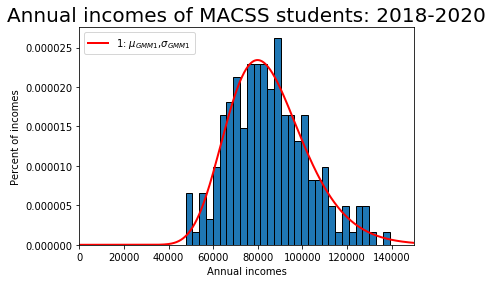

In [118]:
num_bins = 30

plt.hist(ics, num_bins, normed=True, edgecolor='k')

plt.title('Annual incomes of MACSS students: 2018-2020', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')
plt.xlim([0, 150000])

dist_ics = np.linspace(0, 150000, 1000)
plt.plot(dist_ics, LN_pdf(dist_ics, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')

In [107]:
# 1(c)

def get_Err_mat2(pts, mu, sigma, simple=False):

    R = 2
    N = len(ics)
    Err_mat = np.zeros((R, N))
    mean_model, std_model = model_moments(mu, sigma)
    if simple:
        Err_mat[0, :] = pts - mean_model
        Err_mat[1, :] = ((mean_data - pts) ** 2) - std_model
    else:
        Err_mat[0, :] = (pts - mean_model) / mean_model
        Err_mat[1, :] = (((mean_data - pts) ** 2) - std_model) / std_model
    
    return Err_mat

Err_mat = get_Err_mat2(ics, mu_GMM1, sig_GMM1, False)
VCV2 = (1 / ics.shape[0]) * (Err_mat @ Err_mat.T)
print("The Variance Co-Variance Matrix is \n", VCV2)
W_hat2 = lin.inv(VCV2)
print("The Weighting Matrix is \n", W_hat2)

The Variance Co-Variance Matrix is 
 [[4.45167045e-02 1.68385256e+03]
 [1.68385256e+03 9.54184435e+08]]
The Weighting Matrix is 
 [[ 2.40701670e+01 -4.24767065e-05]
 [-4.24767065e-05  1.12297421e-09]]


In [108]:
params_init = np.array([mu_GMM1, sig_GMM1])
gmm_args = (ics, W_hat2)
results_2 = opt.minimize(criterion, params_init, args=(gmm_args), tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2, sig_GMM2 = results_2.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)

mu_GMM2= 11.331880842298673  sig_GMM2= 0.2086966480920631


In [109]:
mean_model2, std_model2 = model_moments(mu_GMM2, sig_GMM2)
err2 = err_vec(ics, mu_GMM2, sig_GMM2, False).reshape(2,)
print('Mean of points =', mean_data, ', Standard Deviation of points =', std_data)
print('Mean of model =', mean_model2, ', Standard Deviation of model =', std_model2)
print('Error vector=', err2)
print('GMM criterion function:', results_2.fun)

Mean of points = 85276.82360625811 , Standard Deviation of points = 17992.542128046523
Mean of model = 85276.82323943319 , Standard Deviation of model = 17992.540859312823
Error vector= [-4.30157821e-09 -7.05144215e-08]
GMM criterion function: [[4.4535838e-16]]


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


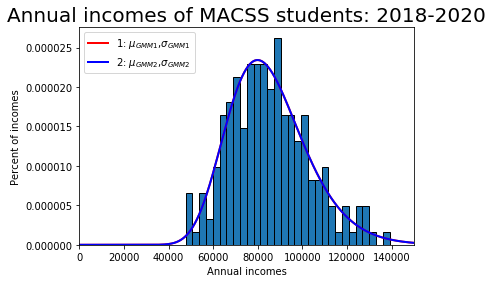

In [110]:
# num_bins = 30

# plt.hist(ics, num_bins, normed=True, edgecolor='k')

# plt.title('Annual incomes of MACSS students: 2018-2020', fontsize=20)
# plt.xlabel(r'Annual incomes')
# plt.ylabel(r'Percent of incomes')
# plt.xlim([0, 150000])

# dist_ics = np.linspace(0, 150000, 1000)
# plt.plot(dist_ics, trunc_lognorm_pdf(dist_ics, mu_GMM1, sig_GMM1, 0.0, 150000),
#          linewidth=2, color='r', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
# plt.legend(loc='upper left')

# plt.plot(dist_ics, trunc_lognorm_pdf(dist_ics, mu_GMM2, sig_GMM2, 0.0, 150000),
#          linewidth=2, color='b', label='2: $\mu_{GMM2}$,$\sigma_{GMM2}$')
# plt.legend(loc='upper left')

# plt.show()

num_bins = 30

plt.hist(ics, num_bins, normed=True, edgecolor='k')

plt.title('Annual incomes of MACSS students: 2018-2020', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')
plt.xlim([0, 150000])

dist_ics = np.linspace(0, 150000, 1000)
plt.plot(dist_ics, LN_pdf(dist_ics, mu_GMM1, sig_GMM1),
         linewidth=2, color='r', label='1: $\mu_{GMM1}$,$\sigma_{GMM1}$')
plt.legend(loc='upper left')

plt.plot(dist_ics, LN_pdf(dist_ics, mu_GMM2, sig_GMM2),
         linewidth=2, color='b', label='2: $\mu_{GMM2}$,$\sigma_{GMM2}$')
plt.legend(loc='upper left')

plt.show()

In [111]:
# 1(d)

def data_moments2(xvals):

    qtl1_data = xvals[xvals <75000].shape[0] / xvals.shape[0]
    qtl2_data = (xvals[(xvals >=75000) & (xvals < 100000)].shape[0] /
                  xvals.shape[0])
    qtl3_data = xvals[xvals >= 100000].shape[0] / xvals.shape[0]

    return qtl1_data, qtl2_data, qtl3_data

def model_moments2(mu, sigma):

    xfx = lambda x: LN_pdf(x, mu, sigma)
    (qtl1_mod, bp_1_err) = intgr.quad(xfx, 0.0, 75000)
    (qtl2_mod, bp_2_err) = intgr.quad(xfx, 75000, 100000)
    (qtl3_mod, bp_3_err) = intgr.quad(xfx, 100000, np.inf)
    
    return qtl1_mod, qtl2_mod, qtl3_mod

def err_vec2(xvals, mu, sigma, simple):

    qtl1_data, qtl2_data, qtl3_data = data_moments2(xvals)
    moms_data = np.array([[qtl1_data], [qtl2_data], [qtl3_data]])
    qtl1_mod, qtl2_mod, qtl3_mod = model_moments2(mu, sigma)
    moms_model = np.array([[qtl1_mod], [qtl2_mod], [qtl3_mod]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    
    return err_vec

def criterion2(params, *args):

    mu, sigma = params
    xvals, W = args
    err = err_vec2(xvals, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    
    return crit_val

In [112]:
mu_init = 11
sig_init = 0.2
params_init2 = np.array([mu_init, sig_init])
W_hat_qtl = np.eye(3)
gmm_args = (ics, W_hat_qtl)
results_qtl = opt.minimize(criterion2, params_init2, args=(gmm_args), tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM1_qtl, sig_GMM1_qtl = results_qtl.x
print('mu_GMM1_qtl=', mu_GMM1_qtl, ' sig_GMM1_qlt=', sig_GMM1_qtl)
print('GMM criterion function:', results_qtl.fun)
print('The three data moments are', data_moments2(ics))
print('The three estimated model moments are', model_moments2(mu_GMM1_qtl, sig_GMM1_qtl))

mu_GMM1_qtl= 11.335681327441126  sig_GMM1_qlt= 0.2105984536986085
GMM criterion function: [[2.53381598e-15]]
The three data moments are (0.3, 0.5, 0.2)
The three estimated model moments are (0.30000000358656426, 0.5000000059034057, 0.19999999051003048)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: IntegrationWarning: The integral is probably divergent, or slowly convergent.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


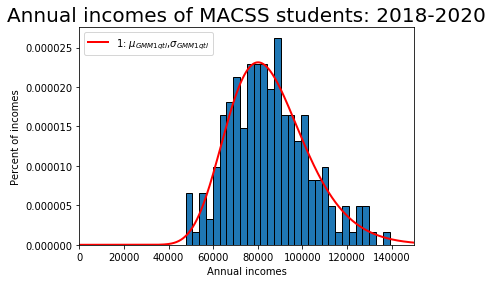

In [113]:
num_bins = 30

plt.hist(ics, num_bins, normed=True, edgecolor='k')

plt.title('Annual incomes of MACSS students: 2018-2020', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')
plt.xlim([0, 150000])

dist_ics = np.linspace(0, 150000, 1000)
plt.plot(dist_ics, LN_pdf(dist_ics, mu_GMM1_qtl, sig_GMM1_qtl),
         linewidth=2, color='r', label='1: $\mu_{GMM1qtl}$,$\sigma_{GMM1qtl}$')
plt.legend(loc='upper left')

In [114]:
# 1(e)

def get_Err_mat2(ics, mu, sigma, simple=False):

    R = 3
    N = len(ics)
    Err_mat = np.zeros((R, N))
    pct_1_mod, pct_2_mod, pct_3_mod = model_moments2(mu, sigma)
    pts_in_grp1 = ics < 75000
    pts_in_grp2 = (ics >= 75000) & (ics < 100000)
    pts_in_grp3 = ics >= 100000

    if simple:
        Err_mat[0, :] = pts_in_grp1 - pct_1_mod
        Err_mat[1, :] = pts_in_grp2 - pct_2_mod
        Err_mat[2, :] = pts_in_grp3 - pct_3_mod
    else:
        Err_mat[0, :] = (pts_in_grp1 - pct_1_mod) / pct_1_mod
        Err_mat[1, :] = (pts_in_grp2 - pct_2_mod) / pct_2_mod
        Err_mat[2, :] = (pts_in_grp3 - pct_3_mod) / pct_3_mod
    
    return Err_mat


Err_mat_qtl = get_Err_mat2(ics, mu_GMM1_qtl, sig_GMM1_qtl, False)
VCV2_qtl = (1 / ics.shape[0]) * (Err_mat_qtl @ Err_mat_qtl.T)
print("The Variance Co-Variance Matrix is \n", VCV2_qtl)
# We use the pseudo-inverse command here because the VCV matrix is poorly conditioned. Many thanks to Evans.
W_hat2_qtl = lin.pinv(VCV2_qtl)
print("The Weighting Matrix is \n", W_hat2_qtl)

The Variance Co-Variance Matrix is 
 [[ 2.33333328 -0.99999998 -1.00000004]
 [-0.99999998  0.99999998 -1.00000004]
 [-1.00000004 -1.00000004  4.00000038]]
The Weighting Matrix is 
 [[ 0.25761773 -0.14958449 -0.01246537]
 [-0.14958449  0.11911357 -0.07340719]
 [-0.01246537 -0.07340719  0.20221605]]


In [115]:
params_init = np.array([mu_GMM1_qtl, sig_GMM1_qtl])
gmm_args = (ics, W_hat2_qtl)
results_2_qtl = opt.minimize(criterion2, params_init, args=(gmm_args), tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-10, None), (1e-10, None)))
mu_GMM2_qtl, sig_GMM2_qtl = results_2_qtl.x
print('mu_GMM2_qtl=', mu_GMM2_qtl, ' sig_GMM2_qtl=', sig_GMM2_qtl)
print('GMM criterion function:', results_2_qtl.fun)
print('The three data moments are', data_moments2(ics))
print('The three estimated model moments are', model_moments2(mu_GMM2_qtl, sig_GMM2_qtl))

mu_GMM2_qtl= 11.335681327441126  sig_GMM2_qtl= 0.2105984536986085
GMM criterion function: [[5.62876099e-16]]
The three data moments are (0.3, 0.5, 0.2)
The three estimated model moments are (0.30000000358656426, 0.5000000059034057, 0.19999999051003048)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


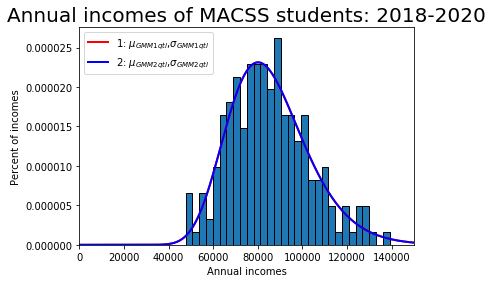

In [116]:
plt.hist(ics, num_bins, normed=True, edgecolor='k')

plt.title('Annual incomes of MACSS students: 2018-2020', fontsize=20)
plt.xlabel(r'Annual incomes')
plt.ylabel(r'Percent of incomes')
plt.xlim([0, 150000])

dist_ics = np.linspace(0, 150000, 1000)
plt.plot(dist_ics, LN_pdf(dist_ics, mu_GMM1_qtl, sig_GMM1_qtl),
         linewidth=2, color='r', label='1: $\mu_{GMM1qtl}$,$\sigma_{GMM1qtl}$')
plt.legend(loc='upper left')

plt.plot(dist_ics, LN_pdf(dist_ics, mu_GMM2_qtl, sig_GMM2_qtl),
         linewidth=2, color='b', label='2: $\mu_{GMM2qtl}$,$\sigma_{GMM2qtl}$')
plt.legend(loc='upper left')

plt.show()

In [117]:
print('The best model would be the two moments estimation with two step weighted matrix since it has lowest GMM criterion value.')
print('The best estimator of mu is', mu_GMM2, ', the best estimator of sigma is', sig_GMM2, ', and the corresponding GMM criterion value is', results_2.fun)
print('The other three candidates are competitive though, with low GMM criterion value as well. This is a clutch game!')

The best model would be the two moments estimation with two step weighted matrix since it has lowest GMM criterion value.
The best estimator of mu is 11.331880842298673 , the best estimator of sigma is 0.2086966480920631 , and the corresponding GMM criterion value is [[4.4535838e-16]]
The other three candidates are competitive though, with low GMM criterion value as well. This is a clutch game!


# Problem 2

In [114]:
data = pd.read_csv("data/sick.txt")

In [117]:
def err_vec3(data, b0, b1, b2, b3):
    
    err_vec = data['sick'] - (b0 + b1 * data['age'] + b2 * data['children'] + b3 * data['avgtemp_winter'])
    
    return err_vec

def criterion3(params, *args):

    b0, b1, b2, b3 = params
    data, W = args
    err_vec = err_vec3(data, b0, b1, b2, b3)
    crit_val = err_vec.T @ W @ err_vec
    
    return crit_val

In [120]:
b0, b1, b2, b3 = (1, 0, 0, 0)
params_init = np.array([b0, b1, b2, b3])
W_hat = np.eye(data.shape[0])
gmm_args = (data, W_hat)
results = opt.minimize(criterion3, params_init, args=(gmm_args), tol=1e-14,method='L-BFGS-B')
b0_GMM, b1_GMM, b2_GMM, b3_GMM = results.x

print('beta_0 =', b0_GMM)
print('beta_1 =', b1_GMM)
print('beta_2 =', b2_GMM)
print('beta_3 =', b3_GMM)
print('GMM criterion function:',results.fun)

beta_0 = 0.2516448636612042
beta_1 = 0.012933470965564249
beta_2 = 0.40050098470289774
beta_3 = -0.009991709711286762
GMM criterion function: 0.0018212898060782808
